In [59]:
# importing the required libraries
import pandas as pd
import numpy as np 
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
import cufflinks as cf

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [60]:
df = pd.read_csv(r'agg.csv',sep=',')

In [61]:
df.head()

,Complaint Date,Zone
0,2018-01-01,19
1,2018-01-02,0
2,2018-01-03,44
3,2018-01-04,27
4,2018-01-05,1


In [62]:
df['Complaint Date'] = pd.to_datetime(df['Complaint Date'])


In [63]:
df.dtypes

Complaint Date    datetime64[ns]
Zone                       int64
dtype: object

# FBPROPHET

In [64]:
from fbprophet import Prophet


In [65]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

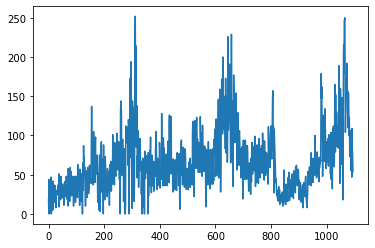

In [66]:
df['y'].plot()

In [67]:
m = Prophet(interval_width=0.95)
m.fit(df)
future = m.make_future_dataframe(periods=180)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
future.tail(30)

,ds
1246,2021-05-31
1247,2021-06-01
1248,2021-06-02
1249,2021-06-03
1250,2021-06-04
1251,2021-06-05
1252,2021-06-06
1253,2021-06-07
1254,2021-06-08
1255,2021-06-09


In [69]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
1246,2021-05-31,118.004372,65.920980,171.444636
1247,2021-06-01,120.757948,68.546067,170.111195
1248,2021-06-02,116.229864,59.154975,169.488831
1249,2021-06-03,111.420125,62.034289,166.761693
1250,2021-06-04,113.393784,65.412587,166.709691
1251,2021-06-05,109.689513,61.470760,158.744833
1252,2021-06-06,93.134686,43.274339,146.588995
1253,2021-06-07,128.013348,72.243326,184.804378
1254,2021-06-08,129.590153,74.386839,183.659287
1255,2021-06-09,123.785124,71.778306,175.050843


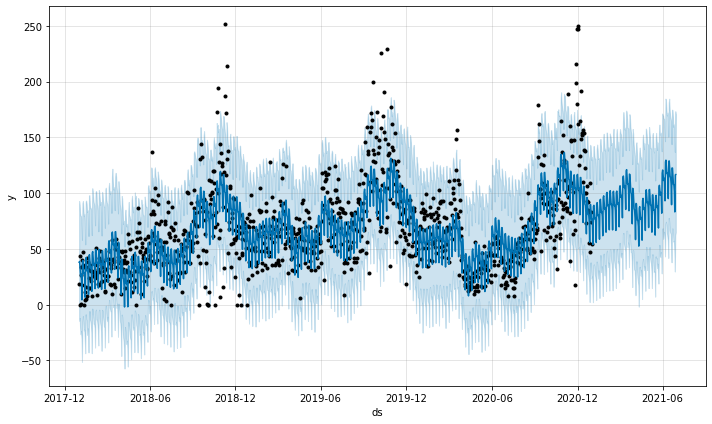

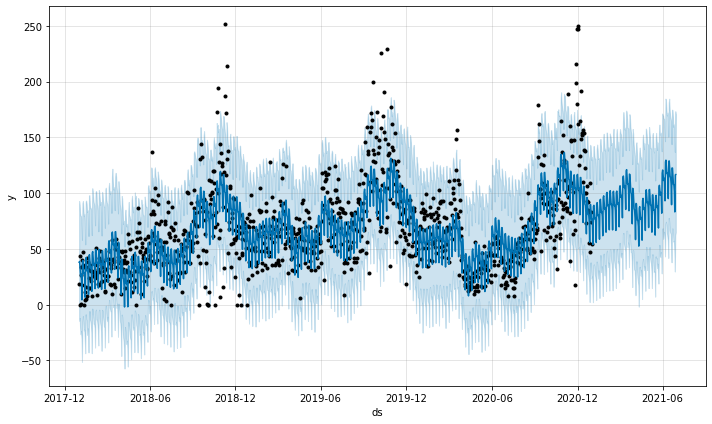

In [70]:
m.plot(forecast)

In [71]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,40.123732,-14.327848,92.947842,40.123732,40.123732,-2.042563,-2.042563,-2.042563,11.140743,11.140743,11.140743,-13.183306,-13.183306,-13.183306,0.0,0.0,0.0,38.081169
1,2018-01-02,40.206951,-11.904297,89.582507,40.206951,40.206951,-1.396198,-1.396198,-1.396198,12.025971,12.025971,12.025971,-13.422170,-13.422170,-13.422170,0.0,0.0,0.0,38.810753
2,2018-01-03,40.290170,-20.924023,81.675585,40.290170,40.290170,-7.829334,-7.829334,-7.829334,5.738899,5.738899,5.738899,-13.568233,-13.568233,-13.568233,0.0,0.0,0.0,32.460836
3,2018-01-04,40.373389,-26.531279,79.758834,40.373389,40.373389,-14.325985,-14.325985,-14.325985,-0.694972,-0.694972,-0.694972,-13.631013,-13.631013,-13.631013,0.0,0.0,0.0,26.047405
4,2018-01-05,40.456609,-23.645608,79.476744,40.456609,40.456609,-13.808783,-13.808783,-13.808783,-0.188263,-0.188263,-0.188263,-13.620520,-13.620520,-13.620520,0.0,0.0,0.0,26.647826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2021-06-25,115.177508,57.385757,161.656073,106.072927,125.131266,-7.721774,-7.721774,-7.721774,-0.188263,-0.188263,-0.188263,-7.533511,-7.533511,-7.533511,0.0,0.0,0.0,107.455734
1272,2021-06-26,115.320579,47.464004,152.713864,106.080867,125.357630,-13.704065,-13.704065,-13.704065,-5.183584,-5.183584,-5.183584,-8.520481,-8.520481,-8.520481,0.0,0.0,0.0,101.616514
1273,2021-06-27,115.463650,29.751824,137.061090,106.103656,125.583993,-32.279938,-32.279938,-32.279938,-22.838795,-22.838795,-22.838795,-9.441143,-9.441143,-9.441143,0.0,0.0,0.0,83.183713
1274,2021-06-28,115.606721,62.347509,173.477805,106.198165,125.827181,0.849929,0.849929,0.849929,11.140743,11.140743,11.140743,-10.290813,-10.290813,-10.290813,0.0,0.0,0.0,116.456651


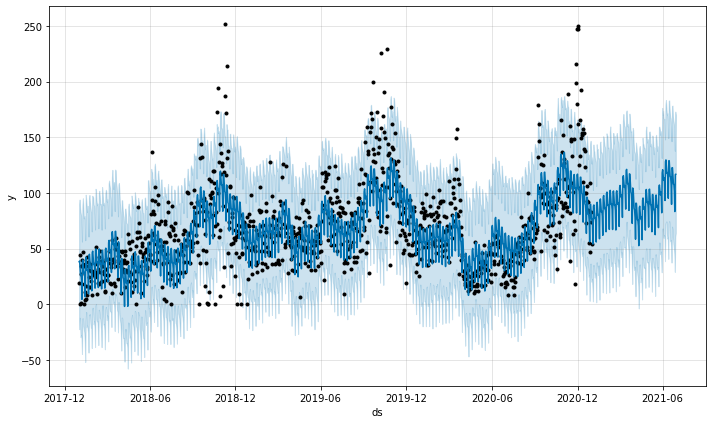

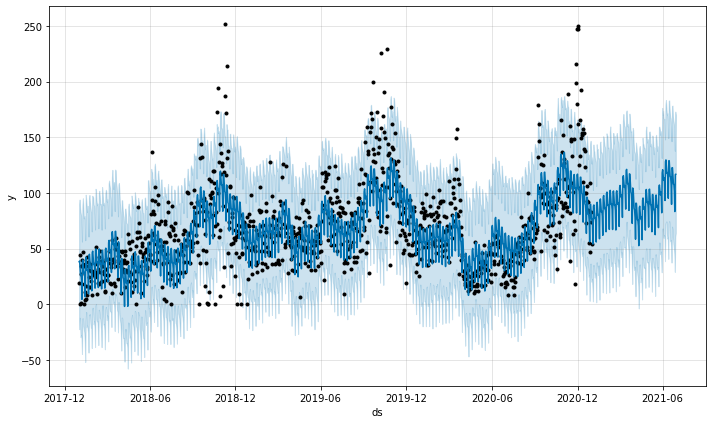

In [41]:
m.plot(forecast)

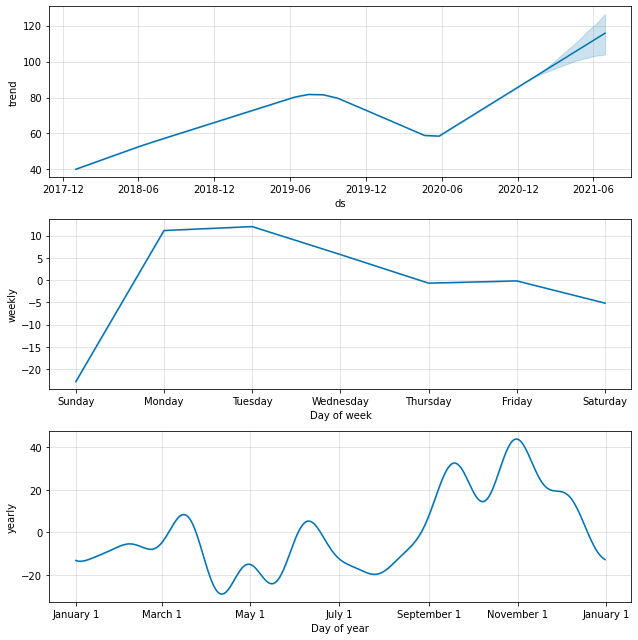

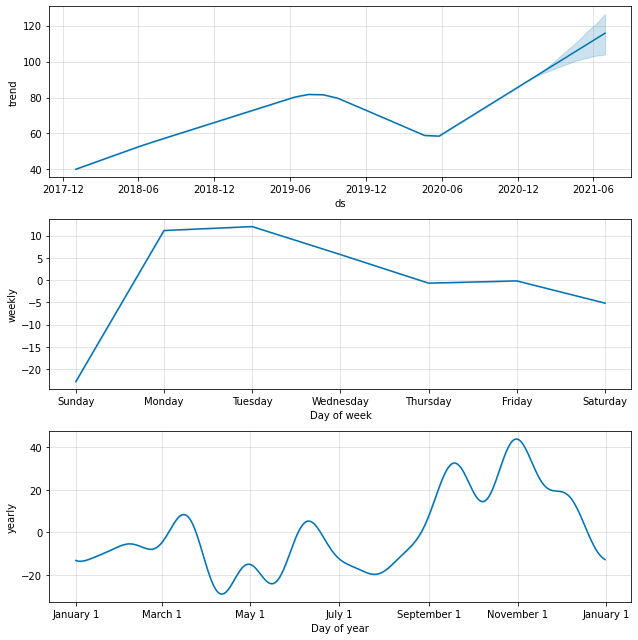

In [42]:
m.plot_components(forecast)

In [43]:
m.plot

<bound method Prophet.plot of <fbprophet.forecaster.Prophet object at 0x000001AC8934BC88>>

In [44]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [45]:
m.daily_seasonality

'auto'

In [56]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m,initial='365 days', period='180 days',horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2019-01-06 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-01-07,62.924613,15.253235,112.639768,70,2019-01-06
1,2019-01-08,57.107732,6.430528,108.749632,75,2019-01-06
2,2019-01-09,55.405635,5.278770,107.462432,50,2019-01-06
3,2019-01-10,51.020913,2.424118,100.997731,51,2019-01-06
4,2019-01-11,51.036028,2.273235,100.497604,48,2019-01-06


In [47]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,319.614638,17.877769,13.244040,0.279606,0.145295,0.972477
1,38 days,328.431968,18.122692,13.314538,0.285577,0.145098,0.972477
2,39 days,325.404002,18.038958,13.140958,0.283120,0.145098,0.972477
3,40 days,322.661791,17.962789,13.129852,0.282814,0.135637,0.972477
4,41 days,329.251791,18.145297,13.268686,0.289265,0.145295,0.972477


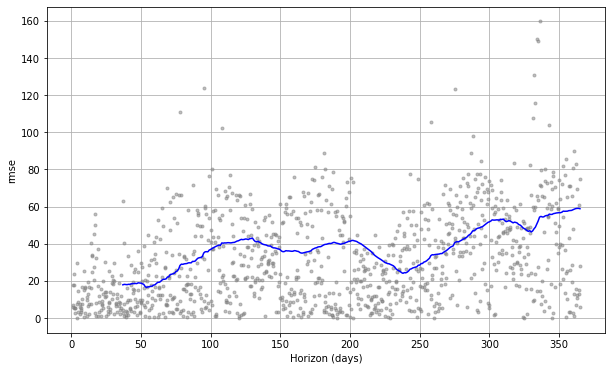

In [48]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [49]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,319.614638,17.877769,13.244040,0.279606,0.145295,0.972477
1,38 days,328.431968,18.122692,13.314538,0.285577,0.145098,0.972477
2,39 days,325.404002,18.038958,13.140958,0.283120,0.145098,0.972477
3,40 days,322.661791,17.962789,13.129852,0.282814,0.135637,0.972477
4,41 days,329.251791,18.145297,13.268686,0.289265,0.145295,0.972477
...,...,...,...,...,...,...,...
324,361 days,3438.738677,58.640760,48.212916,0.950983,0.542188,0.492355
325,362 days,3472.292917,58.926165,48.354939,0.975887,0.555527,0.492355
326,363 days,3485.135466,59.035036,48.379701,0.987535,0.542188,0.492355
327,364 days,3486.163203,59.043740,48.274139,0.990978,0.542188,0.492355


In [50]:
df_cv.shape

(1095, 6)

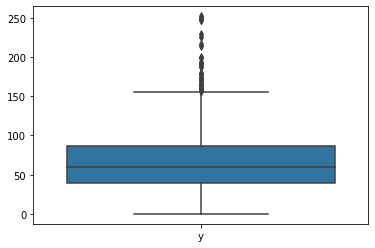

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)

In [76]:
import numpy as np
se = np.square(forecast.iloc[:1097,-1] - df.iloc[:1097,-1])
mse = np.mean(se)
rmse = np.sqrt(mse)

In [77]:
rmse

27.215908488015668

In [58]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,319.614638,17.877769,13.244040,0.279606,0.145295,0.972477
1,38 days,328.431968,18.122692,13.314538,0.285577,0.145098,0.972477
2,39 days,325.404002,18.038958,13.140958,0.283120,0.145098,0.972477
3,40 days,322.661791,17.962789,13.129852,0.282814,0.135637,0.972477
4,41 days,329.251791,18.145297,13.268686,0.289265,0.145295,0.972477
...,...,...,...,...,...,...,...
324,361 days,3438.738677,58.640760,48.212916,0.950983,0.542188,0.492355
325,362 days,3472.292917,58.926165,48.354939,0.975887,0.555527,0.492355
326,363 days,3485.135466,59.035036,48.379701,0.987535,0.542188,0.492355
327,364 days,3486.163203,59.043740,48.274139,0.990978,0.542188,0.492355


In [74]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,40.123732,-14.327848,92.947842,40.123732,40.123732,-2.042563,-2.042563,-2.042563,11.140743,11.140743,11.140743,-13.183306,-13.183306,-13.183306,0.0,0.0,0.0,38.081169
1,2018-01-02,40.206951,-11.904297,89.582507,40.206951,40.206951,-1.396198,-1.396198,-1.396198,12.025971,12.025971,12.025971,-13.422170,-13.422170,-13.422170,0.0,0.0,0.0,38.810753
2,2018-01-03,40.290170,-20.924023,81.675585,40.290170,40.290170,-7.829334,-7.829334,-7.829334,5.738899,5.738899,5.738899,-13.568233,-13.568233,-13.568233,0.0,0.0,0.0,32.460836
3,2018-01-04,40.373389,-26.531279,79.758834,40.373389,40.373389,-14.325985,-14.325985,-14.325985,-0.694972,-0.694972,-0.694972,-13.631013,-13.631013,-13.631013,0.0,0.0,0.0,26.047405
4,2018-01-05,40.456609,-23.645608,79.476744,40.456609,40.456609,-13.808783,-13.808783,-13.808783,-0.188263,-0.188263,-0.188263,-13.620520,-13.620520,-13.620520,0.0,0.0,0.0,26.647826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2021-06-25,115.177508,57.385757,161.656073,106.072927,125.131266,-7.721774,-7.721774,-7.721774,-0.188263,-0.188263,-0.188263,-7.533511,-7.533511,-7.533511,0.0,0.0,0.0,107.455734
1272,2021-06-26,115.320579,47.464004,152.713864,106.080867,125.357630,-13.704065,-13.704065,-13.704065,-5.183584,-5.183584,-5.183584,-8.520481,-8.520481,-8.520481,0.0,0.0,0.0,101.616514
1273,2021-06-27,115.463650,29.751824,137.061090,106.103656,125.583993,-32.279938,-32.279938,-32.279938,-22.838795,-22.838795,-22.838795,-9.441143,-9.441143,-9.441143,0.0,0.0,0.0,83.183713
1274,2021-06-28,115.606721,62.347509,173.477805,106.198165,125.827181,0.849929,0.849929,0.849929,11.140743,11.140743,11.140743,-10.290813,-10.290813,-10.290813,0.0,0.0,0.0,116.456651
